In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the dataset again
df = pd.read_csv('merged_dataset.csv')

In [2]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
features = df[['trip_distance', 'trip_duration', 'total_amount', 'PRCP', 'SNOW', 'Tavg', 'passenger_count']]

# Min-max scaling the features
min_max_scaler = MinMaxScaler()
scaled_features = min_max_scaler.fit_transform(features)


# Creating a DataFrame for the scaled features for easier handling in the future
scaled_features_df = pd.DataFrame(scaled_features, columns=features.columns)
scaled_features_df.to_csv('hclustdata.csv', index=False)
# Displaying the first few rows of the scaled features to verify the transformation
scaled_features_df.head()

trip_distance  trip_duration  total_amount      PRCP  SNOW      Tavg  \
0       0.073308       0.207636      0.141414  0.000000   0.0  0.313725   
1       0.040232       0.109647      0.089168  0.000000   0.0  0.869281   
2       0.040232       0.174016      0.106235  0.054054   0.0  0.882353   
3       0.352805       0.293800      0.351794  0.000000   0.0  0.849673   
4       0.176402       0.333671      0.241495  0.016216   0.0  0.601307   

   passenger_count  
0         0.166667  
1         0.166667  
2         0.500000  
3         0.166667  
4         0.333333

c:\Users\varun\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\varun\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\varun\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\varun\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\varun\anaconda3\Lib\site-packages\sklearn\clust

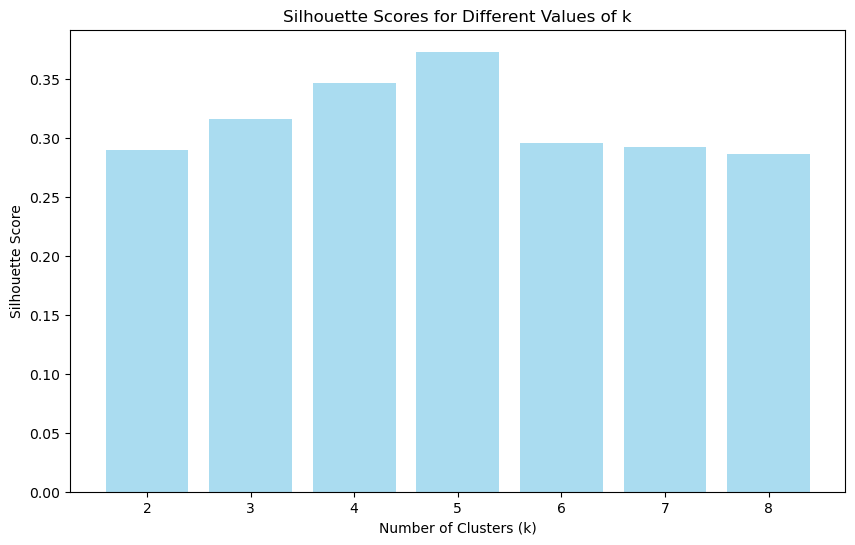

[0.290309579481135,
 0.31642233556658816,
 0.34650618790389087,
 0.3734009358612751,
 0.29575460852763297,
 0.2927345372465971,
 0.2865489688118662]

In [3]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# We'll test k-means clustering with 3 different values of k (e.g., 2, 3, 4) as suggested
k_values = [2, 3, 4,5,6,7,8]
silhouette_scores = []

# Perform k-means clustering for each value of k and calculate silhouette scores
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_features_df)
    silhouette_avg = silhouette_score(scaled_features_df, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plotting the silhouette scores for each k
plt.figure(figsize=(10, 6))
plt.bar(range(len(k_values)), silhouette_scores, align='center', color='skyblue', alpha=0.7)
plt.xticks(range(len(k_values)), k_values)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different Values of k')
plt.show()

silhouette_scores


In [9]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

c:\Users\varun\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



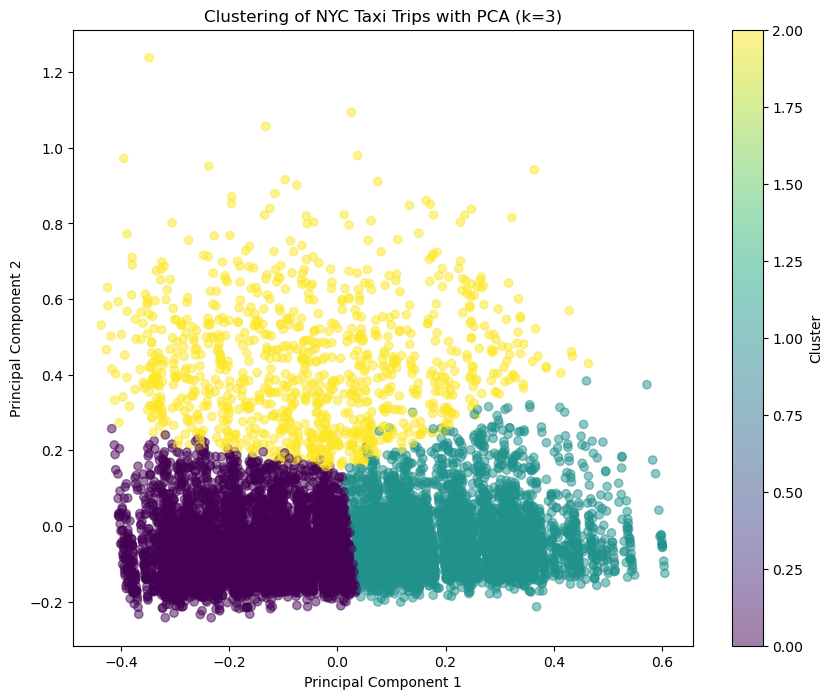

In [14]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_features)
df['Cluster'] = cluster_labels

# Apply PCA for dimensionality reduction for visualization purposes
pca = PCA(n_components=2)  # Change to 3 if you prefer 3D visualization
pca_features = pca.fit_transform(scaled_features)

# Plotting
plt.figure(figsize=(10, 8))

if pca.n_components == 2:
    plt.scatter(pca_features[:, 0], pca_features[:, 1], c=df['Cluster'], cmap='viridis', marker='o', alpha=0.5)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
else:
    ax = plt.figure(figsize=(10, 8)).gca(projection='3d')
    ax.scatter(pca_features[:, 0], pca_features[:, 1], pca_features[:, 2], c=df['Cluster'], cmap='viridis', marker='o', alpha=0.5)
    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    ax.set_zlabel('Principal Component 3')

plt.colorbar(label='Cluster')
plt.title('Clustering of NYC Taxi Trips with PCA (k=3)')
plt.show()

c:\Users\varun\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



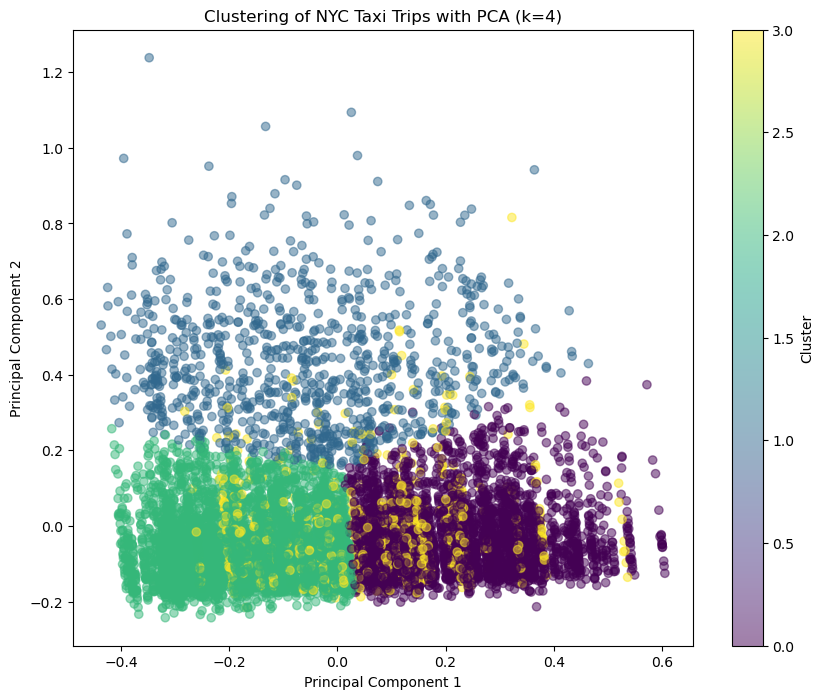

In [15]:
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_features)
df['Cluster'] = cluster_labels

# Apply PCA for dimensionality reduction for visualization purposes
pca = PCA(n_components=2)  # Change to 3 if you prefer 3D visualization
pca_features = pca.fit_transform(scaled_features)

# Plotting
plt.figure(figsize=(10, 8))

if pca.n_components == 2:
    plt.scatter(pca_features[:, 0], pca_features[:, 1], c=df['Cluster'], cmap='viridis', marker='o', alpha=0.5)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
else:
    ax = plt.figure(figsize=(10, 8)).gca(projection='3d')
    ax.scatter(pca_features[:, 0], pca_features[:, 1], pca_features[:, 2], c=df['Cluster'], cmap='viridis', marker='o', alpha=0.5)
    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    ax.set_zlabel('Principal Component 3')

plt.colorbar(label='Cluster')
plt.title('Clustering of NYC Taxi Trips with PCA (k=4)')
plt.show()

c:\Users\varun\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



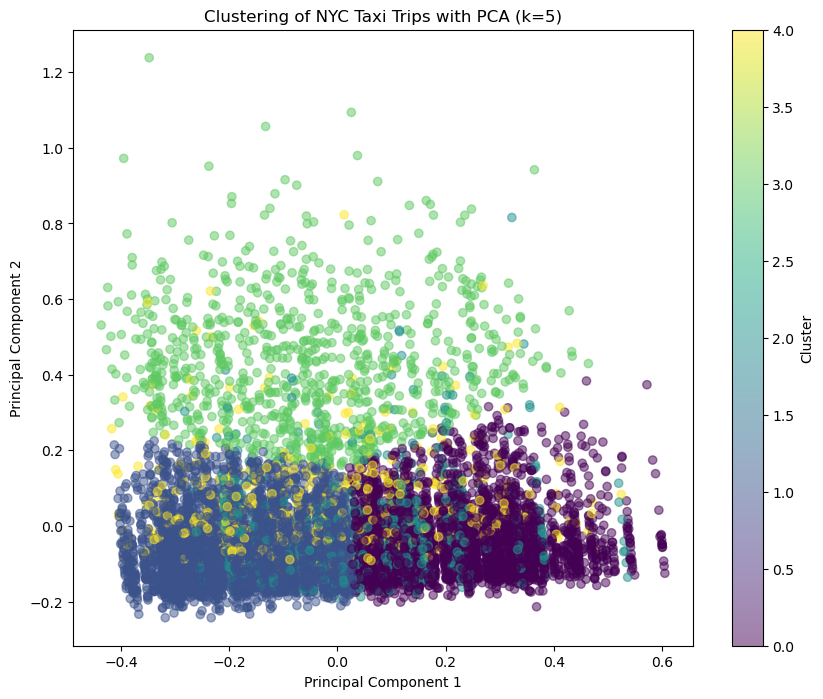

In [16]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_features)
df['Cluster'] = cluster_labels

# Apply PCA for dimensionality reduction for visualization purposes
pca = PCA(n_components=2)  # Change to 3 if you prefer 3D visualization
pca_features = pca.fit_transform(scaled_features)

# Plotting
plt.figure(figsize=(10, 8))

if pca.n_components == 2:
    plt.scatter(pca_features[:, 0], pca_features[:, 1], c=df['Cluster'], cmap='viridis', marker='o', alpha=0.5)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
else:
    ax = plt.figure(figsize=(10, 8)).gca(projection='3d')
    ax.scatter(pca_features[:, 0], pca_features[:, 1], pca_features[:, 2], c=df['Cluster'], cmap='viridis', marker='o', alpha=0.5)
    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    ax.set_zlabel('Principal Component 3')

plt.colorbar(label='Cluster')
plt.title('Clustering of NYC Taxi Trips with PCA (k=5)')
plt.show()

In [7]:
import pandas as pd
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

# Apply PCA for dimensionality reduction for visualization purposes
pca = PCA(n_components=3)
pca_features = pca.fit_transform(scaled_features)

# Creating a DataFrame for the PCA features and cluster labels
pca_df = pd.DataFrame(pca_features, columns=['PC1', 'PC2', 'PC3'])
pca_df['Cluster'] = df['Cluster']

# Plotting in 3D using Plotly
fig = px.scatter_3d(pca_df, x='PC1', y='PC2', z='PC3', color='Cluster', labels={'Cluster': 'Cluster'})
fig.update_layout(title='3D Clustering of NYC Taxi Trips with PCA (k=3)')
fig.show()

c:\Users\varun\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [8]:
# For k=4
kmeans_4 = KMeans(n_clusters=4, random_state=42)
df['Cluster_k4'] = kmeans_4.fit_predict(scaled_features)

# Apply PCA
pca_features_k4 = pca.fit_transform(scaled_features)

# DataFrame for PCA features and cluster labels for k=4
pca_df_k4 = pd.DataFrame(pca_features_k4, columns=['PC1', 'PC2', 'PC3'])
pca_df_k4['Cluster'] = df['Cluster_k4']

# Plotting in 3D for k=4
fig_k4 = px.scatter_3d(pca_df_k4, x='PC1', y='PC2', z='PC3', color='Cluster', labels={'Cluster': 'Cluster_k4'})
fig_k4.update_layout(title='3D Clustering of NYC Taxi Trips with PCA (k=4)')
fig_k4.show()


c:\Users\varun\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [9]:
# Repeat for k=5
kmeans_5 = KMeans(n_clusters=5, random_state=42)
df['Cluster_k5'] = kmeans_5.fit_predict(scaled_features)

# Apply PCA for k=5
pca_features_k5 = pca.fit_transform(scaled_features)

# DataFrame for PCA features and cluster labels for k=5
pca_df_k5 = pd.DataFrame(pca_features_k5, columns=['PC1', 'PC2', 'PC3'])
pca_df_k5['Cluster'] = df['Cluster_k5']

# Plotting in 3D for k=5
fig_k5 = px.scatter_3d(pca_df_k5, x='PC1', y='PC2', z='PC3', color='Cluster', labels={'Cluster': 'Cluster_k5'})
fig_k5.update_layout(title='3D Clustering of NYC Taxi Trips with PCA (k=5)')
fig_k5.show()

c:\Users\varun\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [13]:

# Calculate statistical summaries for each cluster
for i in range(k):  # Replace 'k' with the number of clusters, e.g., 4
    cluster_data = df[df['Cluster'] == i]
    print(f"Statistics for Cluster {i}:")
    print(cluster_data.describe())  # This will print out the descriptive statistics for the cluster
    print("\n")

Statistics for Cluster 0:
       passenger_count  trip_distance   RatecodeID  payment_type  \
count      3285.000000    3285.000000  3285.000000   3285.000000   
mean          1.174125       2.338922     1.027702      1.165906   
std           0.469665       2.094707     0.318186      0.504119   
min           0.000000       0.000000     1.000000      0.000000   
25%           1.000000       1.050000     1.000000      1.000000   
50%           1.000000       1.680000     1.000000      1.000000   
75%           1.000000       2.850000     1.000000      1.000000   
max           3.000000      17.800000     5.000000      4.000000   

       total_amount  trip_duration         PRCP         SNOW         Tavg  \
count   3285.000000    3285.000000  3285.000000  3285.000000  3285.000000   
mean      17.631175      12.541811     0.047434     0.042922    40.025266   
std        9.090231       7.592595     0.118604     0.373574     9.629430   
min        0.000000       0.000000     0.000000     0

The statistical summaries you provided for each cluster give us a good insight into the characteristics and differences between the taxi trips in each group. Here's an interpretation of each cluster based on the provided statistics:

Cluster 0:

Contains 4,907 trips.
Passengers: Most trips have 1 passenger, with a mean slightly higher.
Trip Distance: Short to moderate trips, with a mean of around 2.32 miles.
Total Amount: Relatively lower total charges, with a mean of approximately $17.49.
Weather: Lower average precipitation, no snow, and warmer temperatures (mean of approximately 69.75°F), suggesting these trips likely occurred on warmer, drier days.
Cluster 1:

Contains 3,997 trips.
Similar to Cluster 0 in passenger count and trip distance but differs in weather conditions.
Weather: Higher average precipitation and some snow, with colder temperatures (mean of approximately 40.85°F), indicating these trips occurred in colder, potentially wetter conditions.
Cluster 2:

Contains 977 trips, making it the smallest cluster.
Trip Distance: Much longer trips on average (mean of approximately 14.48 miles), which is significantly higher than Clusters 0 and 1.
Total Amount: Highest total charges, with a mean of about $62.33, likely due to the longer trip distances.
Trip Duration: Substantially longer, with a mean of around 43.43 minutes.
Weather: Varying conditions, with a moderate average temperature of approximately 58.75°F.
From this analysis, it seems that:

Cluster 0 could represent your typical taxi trips on warmer and drier days with short to moderate distances.
Cluster 1 might represent trips taken in colder and wetter conditions.
Cluster 2 stands out as the cluster for long-distance trips, which are likely to be airport runs or trips to areas far from the city center. This cluster also includes trips with the longest durations and highest fares.
To further understand your clustering results, you could also look into:

Temporal Patterns: Check if there's any time-of-day or day-of-week pattern within each cluster.
Spatial Patterns: Investigate if certain clusters are associated with specific pickup or drop-off locations.
Rate Codes and Payment Types: Explore if specific rate codes or payment types are more prevalent in certain clusters, which might indicate different usage patterns (e.g., corporate accounts, street hails, or pre-booked rides).

Based on the summary statistics for the clusters obtained from hierarchical clustering, we can derive the following insights:

**Cluster 0:**
- This cluster has trips with a moderate number of passengers (usually 1), relatively shorter trip distances, and smaller total amounts charged. 
- The weather conditions (precipitation and snow) and temperatures are generally mild, with low maxima indicating that these trips did not occur during extreme weather.
- The trip duration is generally short to moderate.

**Cluster 1:**
- Similar to Cluster 0 in terms of the number of passengers and trip distance but slightly higher in the total amount charged and trip duration.
- All trips occurred with no snow and mostly in warmer temperatures, indicating a different season from Cluster 0 or specific weather conditions.

**Cluster 2:**
- This cluster has a slightly higher average number of passengers and trip distance, indicating a tendency for slightly longer trips.
- It has the highest average precipitation, suggesting these trips occurred during the rainiest conditions compared to other clusters.
- The temperature range is broad, with trips occurring in cooler conditions, possibly indicating a different season or time of day.

**Cluster 3:**
- This cluster stands out with the longest average trip distances, significantly higher total amounts charged, and longest trip durations, suggesting these are likely long-haul trips.
- The weather conditions (PRCP and SNOW) have some presence but not as pronounced as in Cluster 2, and the temperature range is moderate.

**Cluster 4:**
- Contains trips with a notably higher number of passengers, possibly indicating group travel or trips with maximum passenger capacity for the vehicle.
- Trip distances and total amounts are also higher on average, which could correlate with the larger number of passengers.
- The weather conditions are mild, with very little snow and average precipitation, and the temperature range is moderate to warm.

**General Observations:**
- Clusters 0 and 1 appear to represent the typical short to moderate urban taxi trips with one passenger, likely individual trips.
- Cluster 2 could be indicative of trips taken during adverse weather conditions, potentially requiring more careful driving and resulting in longer durations.
- Cluster 3 likely represents the most exceptional group, with long-distance trips that are more expensive and have longer durations.
- Cluster 4 suggests group travel or full-capacity vehicle trips, which have longer distances and higher charges but don't necessarily correspond with adverse weather conditions.

**Further Analysis:**
- It would be useful to analyze the temporal aspects of these trips (time of day, day of the week) to see if there's a pattern in when these clusters of trips occur.
- Considering the geographical data (start and end locations) could provide insights into the routes and purposes of the trips.
- Understanding the specific context of high passenger counts in Cluster 4 and correlating it with event dates or tourist seasons could be valuable.

These insights can help in understanding customer behavior, optimizing fleet management, and potentially designing targeted services or promotions for different customer segments represented by the clusters.